This notebook will try to understand directionality of DHS's in terms of the loops that they are involved in.

In [226]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import collections
import scipy
import scipy.stats
import cPickle as pickle
csv.register_dialect("textdialect", delimiter='\t')
HOME = "/home/raflynn/directionality"
! mkdir interm/nb2
%matplotlib inline

mkdir: cannot create directory `interm/nb2': File exists


## Prepare DHS and looping data

In [224]:
dhs = pd.read_table("interm/nb1/160504_dhs_grodirec_sorted.bed", header=None)
dhs.head()

,0,1,2,3,4,5
0,chr1,3051710,3053710,chr1__3051710__3053710__3053055__DHSpeak_1__13...,2.711702,+
1,chr1,3332745,3334745,chr1__3332745__3334745__3333745__DHSpeak_2__12...,0.475715,-
2,chr1,3434895,3436895,chr1__3434895__3436895__3435895__DHSpeak_3__12...,0.000000,+
3,chr1,3472095,3474095,chr1__3472095__3474095__3473095__DHSpeak_4__11...,3.256955,-
4,chr1,3659925,3661925,chr1__3659925__3661925__3660925__DHSpeak_7__10...,inf,-


In [225]:
dhsdata = pd.read_table("interm/nb1/160504_dhs_grodirec_data.txt")
dhsdata.head()

,name,GROcomb_total,Startseq_total,GROcomb_direc,Startseq_direc
0,chr10__100050901__100052901__100051905__DHSpea...,2.676530,2.028329,-2.315269,-5.391503
1,chr10__100203865__100205865__100204865__DHSpea...,-inf,-inf,NaN,NaN
2,chr10__10040115__10042115__10041115__DHSpeak_6...,-3.458490,-2.259805,-inf,-inf
3,chr10__10074565__10076565__10075565__DHSpeak_6...,-inf,-inf,NaN,NaN
4,chr10__101044763__101046763__101045955__DHSpea...,-1.881533,-3.684404,-2.046448,5.052868


In [226]:
loops = pd.read_table("data/loop/HiChIP_v65_merge_hiccups_default")
loops.head()

,chr1,x1,x2,chr2,y1,y2,color,binBL,binDonut,binH,...,expectedH,expectedV,fdrBL,fdrDonut,fdrH,fdrV,numCollapsed,observed,peak,radius
0,chr10,50620000,50630000,chr10,51740000,51750000,"0,255,255",0,1,0,...,1.140561,1.431510,0.000153,0.000035,0.000368,0.000037,1,14,3,25000
1,chr10,89540000,89545000,chr10,90150000,90155000,"0,255,255",2,2,4,...,2.597734,1.689074,0.000066,0.000061,0.005890,0.000097,1,15,3,22500
2,chr10,26095000,26100000,chr10,26610000,26615000,"0,255,255",3,5,4,...,3.127978,3.669037,0.000022,0.002948,0.000379,0.003214,1,17,4,22500
3,chr10,62545000,62550000,chr10,62595000,62600000,"0,255,255",3,6,3,...,2.407262,3.940076,0.000022,0.016392,0.000033,0.003214,1,17,3,22500
4,chr10,31460000,31470000,chr10,32610000,32620000,"0,255,255",3,4,4,...,2.678602,2.727523,0.000015,0.000404,0.000562,0.000412,1,17,5,25000


In [36]:
loops_samechr = loops[loops["chr1"] == loops["chr2"]]
loops_samechr_coll = pd.concat([loops_samechr["chr1"],
                                (loops_samechr["x1"] + loops_samechr["x2"])/2,
                                (loops_samechr["y1"] + loops_samechr["y2"])/2],
                               axis=1)
loops_samechr_coll[1] = loops_samechr_coll[1].astype(int)
loops_samechr_coll[2] = loops_samechr_coll[2].astype(int)
loops_samechr_coll.to_csv("interm/nb2/mES_hichip_loops_collapsed.bed", header=False, index=False, sep='\t')
! sort -k1,1 -k2,2n interm/nb2/mES_hichip_loops_collapsed.bed > interm/nb2/mES_hichip_loops_collapsed_sorted.bed
! head interm/nb2/mES_hichip_loops_collapsed_sorted.bed

chr1	4482500	4757500
chr1	4482500	5007500
chr1	4485000	19095000
chr1	4485000	19205000
chr1	5175000	5895000
chr1	5907500	6127500
chr1	6395000	6845000
chr1	7002500	7197500
chr1	7005000	7075000
chr1	7545000	7755000


In [40]:
! bedtools intersect -a interm/nb2/mES_hichip_loops_collapsed_sorted.bed \
-b interm/nb1/160504_dhs_grodirec_sorted.bed -wa -wb -sorted > interm/nb2/mES_loops_overlap_dhs.txt
! head interm/nb2/mES_loops_overlap_dhs.txt
! wc -l interm/nb2/mES_loops_overlap_dhs.txt

chr1	4482500	4757500	chr1	4480869	4482869	chr1__4480869__4482869__4481775__DHSpeak_19__10_Poised_Promoter__31	2.5582237840069735	-
chr1	4482500	4757500	chr1	4482017	4484017	chr1__4482017__4484017__4483095__DHSpeak_20__10_Poised_Promoter__765	inf	+
chr1	4482500	4757500	chr1	4482794	4484794	chr1__4482794__4484794__4483835__DHSpeak_21__11_Repressed__210	inf	-
chr1	4482500	4757500	chr1	4485834	4487834	chr1__4485834__4487834__4486805__DHSpeak_23__10_Poised_Promoter__589	0	+
chr1	4482500	4757500	chr1	4533493	4535493	chr1__4533493__4535493__4534225__DHSpeak_24__8_Strong_Enhancer__228	1.4625469561615498	-
chr1	4482500	4757500	chr1	4587645	4589645	chr1__4587645__4589645__4588645__DHSpeak_26__8_Strong_Enhancer__0	inf	-
chr1	4482500	4757500	chr1	4601105	4603105	chr1__4601105__4603105__4602105__DHSpeak_28__12_Heterochrom__0	inf	-
chr1	4482500	4757500	chr1	4649536	4651536	chr1__4649536__4651536__4650345__DHSpeak_29__12_Heterochrom__513	2.2300007453930761	-
chr1	4482500	5007500	chr1	4480869	4482869	

## Do loops have characteristic directionalities?

In [227]:
loop_to_dhs = collections.defaultdict(lambda: [])
with open("interm/nb2/mES_loops_overlap_dhs.txt", 'r') as ifile:
    reader = csv.reader(ifile, 'textdialect')
    for row in reader:
        loop = '__'.join(row[:3])
        loop_to_dhs[loop].append(row[3:])

In [273]:
all_num_plus = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_num_plus_sim = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_enh_plus = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_enh_plus_sim = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_prom_plus = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_prom_plus_sim = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
num_counter = num_sim_counter = enh_counter = enh_sim_counter = prom_counter = prom_sim_counter = 0
for loop in loop_to_dhs:
    if num_counter % 1000 == 0: print num_counter
    dhs_list = loop_to_dhs[loop]
    num_plus = num_total = enh_plus = enh_total = prom_plus = prom_total = 0
    
    for dhs in dhs_list:
        if dhs[4] == '0': continue
        num_total += 1
        if dhs[5] == '+': num_plus += 1
        if 'enhancer' in dhs[3].lower(): 
            enh_total += 1
            if dhs[5] == '+': enh_plus += 1
        elif 'promoter' in dhs[3].lower(): 
            prom_total += 1
            if dhs[5] == '+': prom_plus += 1   
                
    if num_total > 0:
        ratio = float(num_plus)/num_total
        ratio = np.max([ratio, 1 - ratio])
        all_num_plus.ix[num_counter,:] = [ratio, num_total]

        num_plus_sim = np.random.binomial(num_total, 0.5)
        sim_ratio = num_plus_sim/float(num_total)
        sim_ratio = np.max([sim_ratio, 1 - sim_ratio])
        all_num_plus_sim.ix[num_counter,:] = [sim_ratio, num_total]
        num_counter += 1
        
    if enh_total > 0:
        ratio = float(enh_plus)/enh_total
        ratio = np.max([ratio, 1 - ratio])
        all_enh_plus.ix[enh_counter,:] = [ratio, enh_total]

        num_plus_sim = np.random.binomial(enh_total, 0.5)
        sim_ratio = num_plus_sim/float(enh_total)
        sim_ratio = np.max([sim_ratio, 1 - sim_ratio])
        all_enh_plus_sim.ix[enh_counter,:] = [sim_ratio, enh_total]
        enh_counter += 1
        
    if prom_total > 0:
        ratio = float(prom_plus)/prom_total
        ratio = np.max([ratio, 1 - ratio])
        all_prom_plus.ix[prom_counter,:] = [ratio, prom_total]

        num_plus_sim = np.random.binomial(prom_total, 0.5)
        sim_ratio = num_plus_sim/float(prom_total)
        sim_ratio = np.max([sim_ratio, 1 - sim_ratio])
        all_prom_plus_sim.ix[prom_counter,:] = [sim_ratio, prom_total]
        prom_counter += 1        

0
1000
2000
3000
4000
5000
6000
7000


5378


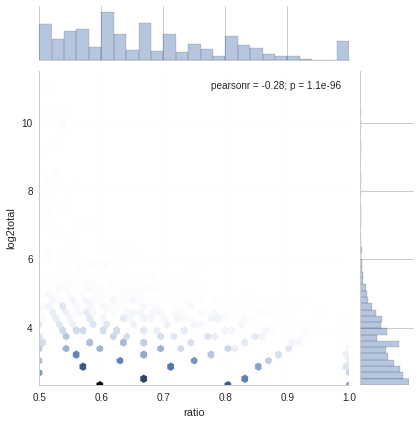

In [293]:
all_num_plus_plot = all_num_plus[(all_num_plus["total"] > 4)]
all_num_plus_plot2 = all_num_plus_plot.copy()
all_num_plus_plot2["log2total"] = np.log2(all_num_plus_plot2["total"])
print all_num_plus_plot.shape[0]
with sns.axes_style("whitegrid"):
    sns.jointplot(x="ratio", y="log2total", data=all_num_plus_plot2, kind="hex")

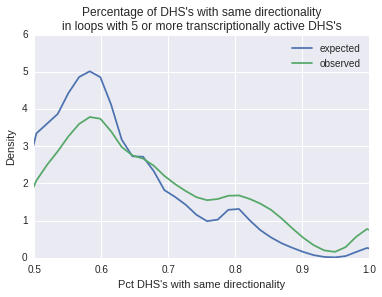

In [292]:
all_num_plus_sim_plot = all_num_plus_sim[(all_num_plus_sim["total"] > 4)]
sns.distplot(all_num_plus_sim_plot["ratio"], label="expected", hist=False)
sns.distplot(all_num_plus_plot["ratio"], label="observed", hist=False)
sns.plt.xlim([0.5,1])
sns.plt.xlabel("Pct DHS's with same directionality")
sns.plt.ylabel("Density")
sns.plt.title("Percentage of DHS's with same directionality\nin loops with 5 or more transcriptionally active DHS's")

In [253]:
a = all_num_plus_plot[all_num_plus_plot["ratio"] >= 0.7].shape[0]/float(all_num_plus_plot.shape[0])
b = all_num_plus_sim_plot[all_num_plus_sim_plot["ratio"] >= 0.7].shape[0]/float(all_num_plus_plot.shape[0])
print a, b, a/b

0.367608776497 0.222573447378 1.65162907268


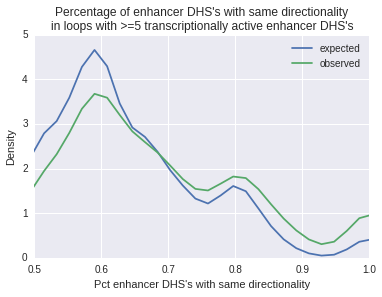

In [290]:
all_enh_plus_plot = all_enh_plus[(all_enh_plus["total"] > 4)]
all_enh_plus_sim_plot = all_enh_plus_sim[(all_enh_plus_sim["total"] > 4)]
sns.distplot(all_enh_plus_sim_plot["ratio"], label="expected", hist=False)
sns.distplot(all_enh_plus_plot["ratio"], label="observed", hist=False)
sns.plt.xlim([0.5,1])
sns.plt.xlabel("Pct enhancer DHS's with same directionality")
sns.plt.ylabel("Density")
sns.plt.title("Percentage of enhancer DHS's with same directionality\nin loops with >=5 transcriptionally active enhancer DHS's")

In [254]:
a = all_enh_plus_plot[all_enh_plus_plot["ratio"] >= 0.7].shape[0]/float(all_enh_plus_plot.shape[0])
b = all_enh_plus_sim_plot[all_enh_plus_sim_plot["ratio"] >= 0.7].shape[0]/float(all_enh_plus_plot.shape[0])
print a, b, a/b

0.397568389058 0.274164133739 1.45011086475


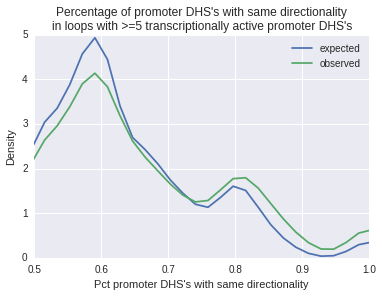

In [291]:
all_prom_plus_plot = all_prom_plus[(all_prom_plus["total"] > 4)]
all_prom_plus_sim_plot = all_prom_plus_sim[(all_prom_plus_sim["total"] > 4)]
sns.distplot(all_prom_plus_sim_plot["ratio"], label="expected", hist=False)
sns.distplot(all_prom_plus_plot["ratio"], label="observed", hist=False)
sns.plt.xlim([0.5,1])
sns.plt.xlabel("Pct promoter DHS's with same directionality")
sns.plt.ylabel("Density")
sns.plt.title("Percentage of promoter DHS's with same directionality\nin loops with >=5 transcriptionally active promoter DHS's")

In [255]:
a = all_prom_plus_plot[all_prom_plus_plot["ratio"] >= 0.7].shape[0]/float(all_prom_plus_plot.shape[0])
b = all_prom_plus_sim_plot[all_prom_plus_sim_plot["ratio"] >= 0.7].shape[0]/float(all_prom_plus_sim_plot.shape[0]) 
print a, b, a/b

0.332740213523 0.255634638197 1.30162412993


Thus, within a loop, DHS's are slightly more likely to be the same direction than by chance, and most of this is driven by enhancers being in the same direction as opposed to promoters being in the same direction.

What about neighboring loops? If loops synchronize direction, then neighboring (non-overlapping) loops should not be expected to have similar directions either.

In [256]:
overall_direc = []
for loop in loop_to_dhs:
    dhs_list = loop_to_dhs[loop]
    p = m = 0
    
    for dhs in dhs_list:
        if dhs[4] == '0': continue
        if dhs[5] == '+': p += 1
        else: m += 1
            
    if p > m: overall_direc.append('p')
    elif p < m: overall_direc.append('m')
    else: overall_direc.append('s')                

In [257]:
# stretches of m's or p's
# todo: include 's' in there; but this probably won't change anything
m_stretch = []
p_stretch = []
ctr = 1
curr = 'x'
for dhs in overall_direc:
    if dhs == curr:
        ctr += 1
    else: 
        if curr == 'm': m_stretch.append(ctr)
        elif curr == 'p': p_stretch.append(ctr)
        curr = dhs
        ctr = 1        

Compared to chance??

In [259]:
print overall_direc.count("m"), overall_direc.count("p"), overall_direc.count("s")

3614 3336 1019


In [260]:
randsamp = ["m"] * overall_direc.count("m")
randsamp.extend(["p"] * overall_direc.count("p"))
randsamp.extend(["s"] * overall_direc.count("s"))

m_sample_stretch = {}
p_sample_stretch = {}
for i in range(50):
    perm = np.random.permutation(randsamp)
    m_stretch = []
    p_stretch = []
    ctr = 1
    curr = 'x'
    for dhs in perm:
        if dhs == curr:
            ctr += 1
        else: 
            if curr == 'm': m_stretch.append(ctr)
            elif curr == 'p': p_stretch.append(ctr)
            curr = dhs
            ctr = 1
    m_sample_stretch[i] = m_stretch
    p_sample_stretch[i] = p_stretch

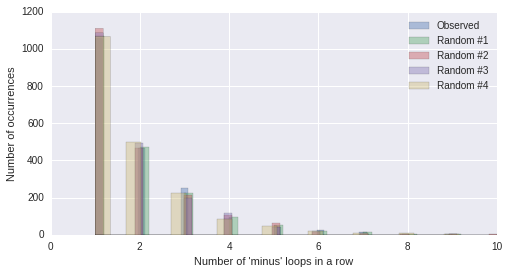

In [289]:
sns.plt.figure(figsize=[8,4])
sns.distplot(m_stretch, kde=False, label="Observed")
sns.distplot(m_sample_stretch[1], kde=False, label="Random #1")
sns.distplot(m_sample_stretch[2], kde=False, label="Random #2")
sns.distplot(m_sample_stretch[3], kde=False, label="Random #3")
sns.distplot(m_sample_stretch[4], kde=False, label="Random #4")
sns.plt.legend()
sns.plt.xlim([0,10])
sns.plt.xlabel("Number of 'minus' loops in a row")
sns.plt.ylabel("Number of occurrences")

Thus, directionality is not synchronized across neighboring loops (compared to chance).

Are loop boundaries in DHS's? Are they enriched for insulators?

In [355]:
loop1 = loops.ix[:,:3]
loop2 = loops.ix[:,3:6]
loop1.columns = ["chr", "x", "y"]
loop2.columns = ["chr", "x", "y"]
boundaries = pd.concat((loop1, loop2))
boundaries.to_csv("interm/nb2/mES_loop_boundaries.bed", header=False, index=False, sep='\t')
! sort -k1,1 -k2,2n interm/nb2/mES_loop_boundaries.bed | uniq > interm/nb2/mES_loop_boundaries_sorted.bed
! head interm/nb2/mES_loop_boundaries_sorted.bed

chr1	4480000	4485000
chr1	4480000	4490000
chr1	4755000	4760000
chr1	5005000	5010000
chr1	5170000	5180000
chr1	5890000	5900000
chr1	5905000	5910000
chr1	6125000	6130000
chr1	6390000	6400000
chr1	6840000	6850000


In [356]:
! bedtools intersect -a interm/nb2/mES_loop_boundaries_sorted.bed \
-b interm/nb1/160504_dhs_grodirec_sorted.bed -wa -wb -sorted > interm/nb2/mES_loop_boundaries_intersectWithDHS.bed
! head -n10 interm/nb2/mES_loop_boundaries_intersectWithDHS.bed

chr1	4480000	4485000	chr1	4479745	4481745	chr1__4479745__4481745__4480745__DHSpeak_18__11_Repressed__0	0	+
chr1	4480000	4485000	chr1	4480869	4482869	chr1__4480869__4482869__4481775__DHSpeak_19__10_Poised_Promoter__31	2.5582237840069735	-
chr1	4480000	4485000	chr1	4482017	4484017	chr1__4482017__4484017__4483095__DHSpeak_20__10_Poised_Promoter__765	inf	+
chr1	4480000	4485000	chr1	4482794	4484794	chr1__4482794__4484794__4483835__DHSpeak_21__11_Repressed__210	inf	-
chr1	4480000	4490000	chr1	4479745	4481745	chr1__4479745__4481745__4480745__DHSpeak_18__11_Repressed__0	0	+
chr1	4480000	4490000	chr1	4480869	4482869	chr1__4480869__4482869__4481775__DHSpeak_19__10_Poised_Promoter__31	2.5582237840069735	-
chr1	4480000	4490000	chr1	4482017	4484017	chr1__4482017__4484017__4483095__DHSpeak_20__10_Poised_Promoter__765	inf	+
chr1	4480000	4490000	chr1	4482794	4484794	chr1__4482794__4484794__4483835__DHSpeak_21__11_Repressed__210	inf	-
chr1	4480000	4490000	chr1	4485834	4487834	chr1__4485834__4487834__44

In [357]:
boundary_to_dhs = collections.defaultdict(lambda: [])
with open("interm/nb2/mES_loop_boundaries_intersectWithDHS.bed", 'r') as ifile:
    reader = csv.reader(ifile, 'textdialect')
    for row in reader:
        boundary_to_dhs['_'.join(row[:2])].append(row[6])
ctr = 0  
ins_ctr = set()
prom_ctr = set()
enh_ctr = set()
for boundary in boundary_to_dhs:
    ctr += 1
    for dhs in boundary_to_dhs[boundary]:
        if 'insulator' in dhs.lower(): ins_ctr.add(boundary)
        if 'promoter' in dhs.lower(): prom_ctr.add(boundary)
        if 'enhancer' in dhs.lower(): enh_ctr.add(boundary)
            
print len(ins_ctr), len(prom_ctr), len(enh_ctr), ctr
print float(len(ins_ctr))/ctr, float(len(prom_ctr))/ctr, float(len(enh_ctr))/ctr

3341 3361 2092 10109
0.330497576417 0.332476011475 0.206944307053


In [358]:
! bedtools intersect -a interm/nb2/mES_loop_boundaries_sorted.bed \
-b data/mESC_cStates_HMM.bed -wa -wb > interm/nb2/mES_loop_boundaries_intersectWithChromHMM.bed
! head -n10 interm/nb2/mES_loop_boundaries_intersectWithChromHMM.bed

chr1	4480000	4485000	chr1	4477200	4481600	11_Repressed	0	.	4477200	4481600	127,127,127
chr1	4480000	4485000	chr1	4481600	4483800	10_Poised_Promoter	0	.	4481600	4483800	207,11,198
chr1	4480000	4485000	chr1	4483800	4486400	11_Repressed	0	.	4483800	4486400	127,127,127
chr1	4480000	4490000	chr1	4477200	4481600	11_Repressed	0	.	4477200	4481600	127,127,127
chr1	4480000	4490000	chr1	4481600	4483800	10_Poised_Promoter	0	.	4481600	4483800	207,11,198
chr1	4480000	4490000	chr1	4483800	4486400	11_Repressed	0	.	4483800	4486400	127,127,127
chr1	4480000	4490000	chr1	4486400	4487800	10_Poised_Promoter	0	.	4486400	4487800	207,11,198
chr1	4480000	4490000	chr1	4487800	4497800	11_Repressed	0	.	4487800	4497800	127,127,127
chr1	4755000	4760000	chr1	4758400	4758800	15_Insulator	0	.	4758400	4758800	10,190,254
chr1	4755000	4760000	chr1	4758800	4759600	1_Txn_Elongation	0	.	4758800	4759600	0,176,80


In [359]:
boundary_to_chromhmm = collections.defaultdict(lambda: [])
with open("interm/nb2/mES_loop_boundaries_intersectWithChromHMM.bed", 'r') as ifile:
    reader = csv.reader(ifile, 'textdialect')
    for row in reader:
        boundary_to_chromhmm['_'.join(row[:2])].append(row[6])
ctr = 0  
ins_ctr = set()
prom_ctr = set()
enh_ctr = set()
for boundary in boundary_to_chromhmm:
    ctr += 1
    for chromhmm in boundary_to_chromhmm[boundary]:
        if 'insulator' in chromhmm.lower(): ins_ctr.add(boundary)
        if 'promoter' in chromhmm.lower(): prom_ctr.add(boundary)
        if 'enhancer' in chromhmm.lower(): enh_ctr.add(boundary)
            
print len(ins_ctr), len(prom_ctr), len(enh_ctr), ctr
print float(len(ins_ctr))/ctr, float(len(prom_ctr))/ctr, float(len(enh_ctr))/ctr

3991 4754 4652 13126
0.304053024531 0.362181928996 0.354411092488


So, about 30% of boundaries coincide roughly with an insulator / insulator-DHS. Later we'll have to define CTCF motifs and directionality more carefully. What this also says is that not every CTCF binding site (since this was HiChIP) is part of a DHS.

## 7SK HiChIRP loops

Here we'll just quickly look at the boundaries of these loops and see if they fall in enhancers and promoters, compared to cohesin loops.

In [335]:
chirploops = pd.read_table("data/loops/HiChIRP_v65_7SK_hiccups.txt")
print chirploops.shape
chirploops.head()

(6106, 25)


,chr1,x1,x2,chr2,y1,y2,color,binBL,binDonut,binH,...,expectedH,expectedV,fdrBL,fdrDonut,fdrH,fdrV,numCollapsed,observed,peak,radius
0,chr10,7100000,7110000,chr10,22100000,22110000,"0,255,255",0,0,0,...,0.319659,0.083819,0.001923,0.005153,0.004656,0.004367,1,13,2,31180
1,chr10,50610000,50620000,chr10,51740000,51750000,"0,255,255",0,0,0,...,0.827062,0.034583,0.001923,0.005153,0.004656,0.004367,1,13,2,31180
2,chr10,22530000,22540000,chr10,23060000,23070000,"0,255,255",1,1,3,...,2.139398,1.492468,0.000150,0.000246,0.015445,0.000288,1,13,2,31180
3,chr10,60875000,60880000,chr10,62355000,62360000,"0,255,255",2,1,1,...,1.507383,1.816983,0.000298,0.000032,0.000038,0.000375,1,14,5,22500
4,chr10,38900000,38905000,chr10,39235000,39240000,"0,255,255",2,3,2,...,1.918248,2.342882,0.000298,0.003199,0.000370,0.002716,1,14,3,22500


In [347]:
loop1 = chirploops.ix[:,:3]
loop2 = chirploops.ix[:,3:6]
loop1.columns = ["chr", "x", "y"]
loop2.columns = ["chr", "x", "y"]
boundaries = pd.concat((loop1, loop2))
avg = ((boundaries["x"] + boundaries["y"])/2).astype(int)
boundaries["x"] = avg - 500
boundaries["y"] = avg + 500
boundaries.to_csv("interm/nb2/mES_7sk_loop_boundaries.bed", header=False, index=False, sep='\t')
! sort -k1,1 -k2,2n interm/nb2/mES_7sk_loop_boundaries.bed | uniq > interm/nb2/mES_7sk_loop_boundaries_sorted.bed
! head interm/nb2/mES_7sk_loop_boundaries_sorted.bed

chr1	4504500	4505500
chr1	4754500	4755500
chr1	4772000	4773000
chr1	4807000	4808000
chr1	4884500	4885500
chr1	5064500	5065500
chr1	5904500	5905500
chr1	6124500	6125500
chr1	8564500	8565500
chr1	8924500	8925500


In [348]:
! bedtools intersect -a interm/nb2/mES_7sk_loop_boundaries_sorted.bed \
-b interm/nb1/160504_dhs_grodirec_sorted.bed -wa -wb -sorted > interm/nb2/mES_7sk_loop_boundaries_intersectWithDHS.bed
! head -n10 interm/nb2/mES_7sk_loop_boundaries_intersectWithDHS.bed

chr1	5904500	5905500	chr1	5904595	5906595	chr1__5904595__5906595__5905595__DHSpeak_66__11_Repressed__0	inf	+
chr1	8924500	8925500	chr1	8925290	8927290	chr1__8925290__8927290__8926335__DHSpeak_146__2_Weak_Txn__116	0.93558025758540342	+
chr1	12707000	12708000	chr1	12707693	12709693	chr1__12707693__12709693__12708445__DHSpeak_251__7_Active_Promoter__196	0.97235271306211846	+
chr1	12854500	12855500	chr1	12854237	12856237	chr1__12854237__12856237__12855595__DHSpeak_264__6_Strong_Enhancer__277	0.75764520276373815	+
chr1	13062000	13063000	chr1	13060766	13062766	chr1__13060766__13062766__13061605__DHSpeak_275__5_Active_Promoter__521	2.6542236111869406	+
chr1	13117000	13118000	chr1	13116270	13118270	chr1__13116270__13118270__13117355__DHSpeak_289__10_Poised_Promoter__57	1.7403644337865949	-
chr1	13117000	13118000	chr1	13117189	13119189	chr1__13117189__13119189__13118155__DHSpeak_290__11_Repressed__327	3.1863518383577496	-
chr1	16647000	16648000	chr1	16646194	16648194	chr1__16646194__16648194__1

In [349]:
boundary_to_dhs = collections.defaultdict(lambda: [])
with open("interm/nb2/mES_7sk_loop_boundaries_intersectWithDHS.bed", 'r') as ifile:
    reader = csv.reader(ifile, 'textdialect')
    for row in reader:
        boundary_to_dhs['_'.join(row[:2])].append(row[6])
ctr = 0  
ins_ctr = set()
prom_ctr = set()
enh_ctr = set()
for boundary in boundary_to_dhs:
    ctr += 1
    for dhs in boundary_to_dhs[boundary]:
        if 'insulator' in dhs.lower(): ins_ctr.add(boundary)
        if 'promoter' in dhs.lower(): prom_ctr.add(boundary)
        if 'enhancer' in dhs.lower(): enh_ctr.add(boundary)
            
print len(ins_ctr), len(prom_ctr), len(enh_ctr), ctr
print float(len(ins_ctr))/ctr, float(len(prom_ctr))/ctr, float(len(enh_ctr))/ctr

1141 1692 1151 4841
0.235695104317 0.349514563107 0.237760793225
